In [88]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import math

Data wrangling and exploration using pandas & numpy


In [2]:
df_train = pd.read_csv("shipping_train_2_pr.csv")

In [3]:
df_train.head()

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067


In [4]:
#unnamed column has no significance hence dropping it .
df_train.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [5]:
df_train.head()

,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067


In [6]:
#checking for missing values columnwise
df_train.isnull().sum()

shipment_id            0
send_timestamp         0
pick_up_point          0
drop_off_point         0
source_country         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
selected               0
shipping_time          0
dtype: int64

In [7]:
df_train.describe()

,freight_cost,gross_weight,shipment_charges,shipping_time
count,5114.000000,5114.000000,5114.000000,5114.000000
mean,91.200923,954.074099,0.871732,12.641822
std,5.154340,1266.102859,0.127972,10.273164
min,82.885600,5.000000,0.562500,5.000000
25%,87.750000,225.000000,0.750000,5.199910
50%,90.750000,505.000000,0.900000,5.405150
75%,92.837500,1100.000000,0.900000,19.644270
max,115.620000,10000.000000,1.125000,57.249650


### As we can see the max(observation) = 5114 . We can also see the field wise statistical measures


In [8]:
#lets find unique values in categorical columns 

In [9]:
df_train["pick_up_point"].unique()

array(['A'], dtype=object)

In [10]:
df_train["drop_off_point"].unique()

array(['Y', 'X'], dtype=object)

In [11]:
df_train["source_country"].unique()

array(['GB'], dtype=object)

In [12]:
df_train["destination_country"].unique()

array(['IN', 'BD'], dtype=object)

In [13]:
df_train["shipment_mode"].unique()

array(['Air', 'Ocean'], dtype=object)

In [14]:
df_train["shipping_company"].unique()

array(['SC3', 'SC1', 'SC2'], dtype=object)

In [15]:
df_train["selected"].unique()

array(['Y'], dtype=object)

### We observed that pick_up_point , source_country and selected are same for all observation hence we can drop it

In [16]:
df_train.drop(columns=['pick_up_point', 'source_country', "selected"], inplace=True)

In [17]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,S000720,2019-06-08 07:17:51,Y,IN,88.61000,355.00,0.7500,Air,SC3,5.00741
1,S000725,2019-07-12 15:23:21,Y,IN,85.65000,105.00,0.9000,Ocean,SC1,21.41215
2,S000736,2019-10-04 14:23:29,Y,IN,86.22000,100.00,0.7500,Air,SC3,5.33692
3,S000738,2020-01-07 09:19:50,Y,IN,94.43000,1071.00,1.0500,Air,SC2,5.14792
4,S000739,2020-04-11 06:36:03,Y,IN,94.24000,2007.00,0.7500,Air,SC3,5.03067
...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.86000,304.00,1.1250,Ocean,SC1,15.26933
5110,S9671147,2020-04-05 16:36:06,X,BD,103.56125,240.00,0.5625,Ocean,SC2,12.41192
5111,S1407148,2020-04-09 10:59:51,X,BD,105.55000,400.00,1.1250,Ocean,SC1,5.68333
5112,S7478148,2020-04-24 15:27:00,X,BD,105.95000,398.00,1.1250,Ocean,SC1,41.97199


### Lets detect outliers in the numeric observations :

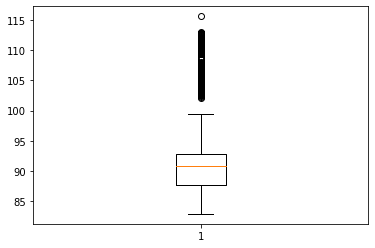

In [18]:
plt.boxplot(df_train['freight_cost'] , whis=1.5 )
plt.show()

In [19]:
def outlier_replacement_zscore(df, column_name, threshold=3):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    df.loc[z_scores > threshold, column_name] = df[column_name].mean()
    return df

In [20]:
df_train = outlier_replacement_zscore(df_train, 'freight_cost', 3)

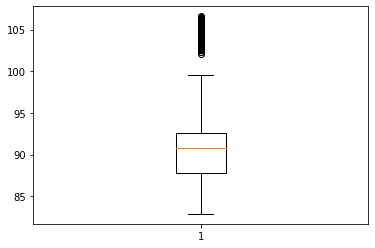

In [21]:
plt.boxplot(df_train['freight_cost'] , whis=1.5 )
plt.show()

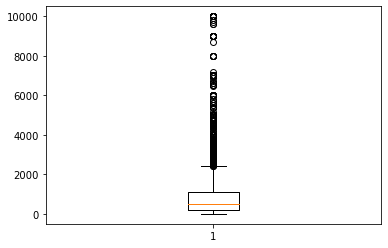

In [22]:
plt.boxplot(df_train['gross_weight'] , whis=1.5 )
plt.show()

In [23]:
df_train = outlier_replacement_zscore(df_train, 'gross_weight', 3)

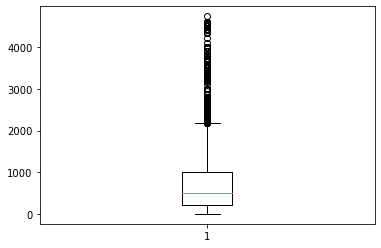

In [24]:
plt.boxplot(df_train['gross_weight'] , whis=1.5 )
plt.show()

In [25]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,S000720,2019-06-08 07:17:51,Y,IN,88.610000,355.00,0.7500,Air,SC3,5.00741
1,S000725,2019-07-12 15:23:21,Y,IN,85.650000,105.00,0.9000,Ocean,SC1,21.41215
2,S000736,2019-10-04 14:23:29,Y,IN,86.220000,100.00,0.7500,Air,SC3,5.33692
3,S000738,2020-01-07 09:19:50,Y,IN,94.430000,1071.00,1.0500,Air,SC2,5.14792
4,S000739,2020-04-11 06:36:03,Y,IN,94.240000,2007.00,0.7500,Air,SC3,5.03067
...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.860000,304.00,1.1250,Ocean,SC1,15.26933
5110,S9671147,2020-04-05 16:36:06,X,BD,103.561250,240.00,0.5625,Ocean,SC2,12.41192
5111,S1407148,2020-04-09 10:59:51,X,BD,105.550000,400.00,1.1250,Ocean,SC1,5.68333
5112,S7478148,2020-04-24 15:27:00,X,BD,105.950000,398.00,1.1250,Ocean,SC1,41.97199


<AxesSubplot:xlabel='shipping_company', ylabel='count'>

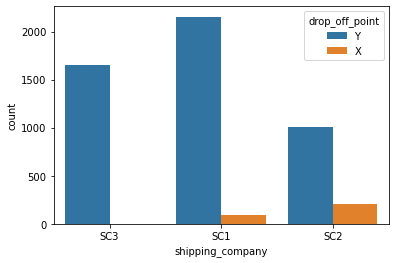

In [26]:
#let plot bar chart 
sns.countplot(x = 'shipping_company', hue = 'drop_off_point', data = df_train)

### SC3 does not drop at X

<AxesSubplot:xlabel='shipping_company', ylabel='count'>

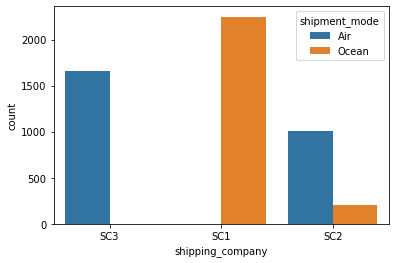

In [27]:
sns.countplot(x = 'shipping_company', hue = 'shipment_mode', data = df_train)

### SC1 has no air transportation facility and SC3 has only air 

<AxesSubplot:xlabel='shipping_company', ylabel='count'>

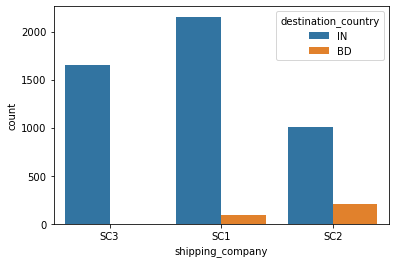

In [28]:
sns.countplot(x = 'shipping_company', hue = 'destination_country', data = df_train)

### SC3 only ship to India and SC1 has maximum shipping to india 

In [29]:
ship_info = pd.read_csv("shipping_master.csv")
ship_info

,source_country,destination_country,shipment_mode,cut_off_time,tat,processing_days,pick_up_point,drop_off_point,min_cs,max_cs,shipping_company,shipment_charges
0,GB,IN,Ocean,12PM IST,Before CO - T+0\nAfter CO - T+1,Mon-Fri,A,Y,100,"2,500,000",SC1,0.9000
1,GB,IN,Air,24/7,Real-time,24/7,A,Y,100,"200,000",SC2,1.0500
2,GB,IN,Air,24/7,Within 15 mins,24/7,A,Y,100,"200,000",SC3,0.7500
3,GB,BD,Ocean,10 - 2 and 3 - 6 BST,Before CO - T+0\nAfter CO - T+1,Sun-Fri,A,X,50,"4,000,000",SC1,1.1250
4,GB,BD,Ocean,10 - 2 and 3 - 6 BST,Before CO - T+0\nAfter CO - T+1,Sun-Fri,A,X,50,"4,000,000",SC2,0.5625


In [30]:
df_train["min_cs"] = None
df_train["max_cs"] = None
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time,min_cs,max_cs
0,S000720,2019-06-08 07:17:51,Y,IN,88.610000,355.00,0.7500,Air,SC3,5.00741,None,None
1,S000725,2019-07-12 15:23:21,Y,IN,85.650000,105.00,0.9000,Ocean,SC1,21.41215,None,None
2,S000736,2019-10-04 14:23:29,Y,IN,86.220000,100.00,0.7500,Air,SC3,5.33692,None,None
3,S000738,2020-01-07 09:19:50,Y,IN,94.430000,1071.00,1.0500,Air,SC2,5.14792,None,None
4,S000739,2020-04-11 06:36:03,Y,IN,94.240000,2007.00,0.7500,Air,SC3,5.03067,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.860000,304.00,1.1250,Ocean,SC1,15.26933,None,None
5110,S9671147,2020-04-05 16:36:06,X,BD,103.561250,240.00,0.5625,Ocean,SC2,12.41192,None,None
5111,S1407148,2020-04-09 10:59:51,X,BD,105.550000,400.00,1.1250,Ocean,SC1,5.68333,None,None
5112,S7478148,2020-04-24 15:27:00,X,BD,105.950000,398.00,1.1250,Ocean,SC1,41.97199,None,None


In [31]:
df_train.loc[df_train['destination_country'] == 'IN', 'min_cs'] = 100
df_train.loc[df_train['destination_country'] == 'BD', 'min_cs'] = 50

In [32]:
df_train.loc[(df_train['destination_country'] == 'IN') & (df_train["shipping_company"] == "SC1"), 'max_cs'] = 2500000
df_train.loc[(df_train['destination_country'] == 'IN') & df_train["shipping_company"].isin(["SC2","SC3"]), 'max_cs'] = 200000
df_train.loc[(df_train['destination_country'] == 'BD') & df_train["shipping_company"].isin(["SC1","SC2"]), 'max_cs'] = 4000000

In [33]:
df_train.isnull().sum()

shipment_id            0
send_timestamp         0
drop_off_point         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
shipping_time          0
min_cs                 0
max_cs                 0
dtype: int64

In [34]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time,min_cs,max_cs
0,S000720,2019-06-08 07:17:51,Y,IN,88.610000,355.00,0.7500,Air,SC3,5.00741,100,200000
1,S000725,2019-07-12 15:23:21,Y,IN,85.650000,105.00,0.9000,Ocean,SC1,21.41215,100,2500000
2,S000736,2019-10-04 14:23:29,Y,IN,86.220000,100.00,0.7500,Air,SC3,5.33692,100,200000
3,S000738,2020-01-07 09:19:50,Y,IN,94.430000,1071.00,1.0500,Air,SC2,5.14792,100,200000
4,S000739,2020-04-11 06:36:03,Y,IN,94.240000,2007.00,0.7500,Air,SC3,5.03067,100,200000
...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.860000,304.00,1.1250,Ocean,SC1,15.26933,50,4000000
5110,S9671147,2020-04-05 16:36:06,X,BD,103.561250,240.00,0.5625,Ocean,SC2,12.41192,50,4000000
5111,S1407148,2020-04-09 10:59:51,X,BD,105.550000,400.00,1.1250,Ocean,SC1,5.68333,50,4000000
5112,S7478148,2020-04-24 15:27:00,X,BD,105.950000,398.00,1.1250,Ocean,SC1,41.97199,50,4000000


### We need to extract processing time or turn around time info of different countries on the basic of given timestamp and cutofftime . Here turnaroundtime is the time taken by companies to complete processing task like collecting , packaging etc which lead to additional time to complete whole shipment

In [35]:
#timezone conversion
def timezone_ist(timestamp):
    #gmt is the source timezone
    gmt = pytz.timezone('GMT')
    ist = pytz.timezone('Asia/Kolkata')
    date = dt.datetime.strptime(timestamp, '%H:%M:%S')
    dategmt = gmt.localize(date)
    dateist = dategmt.astimezone(ist)
    return dateist.strftime("%H:%M:%S")
def timezone_bst(timestamp):
    gmt = pytz.timezone('GMT')
    bst = pytz.timezone('Asia/Dhaka')
    date = dt.datetime.strptime(timestamp, '%H:%M:%S')
    dategmt = gmt.localize(date)
    datebst = dategmt.astimezone(bst)
    return datebst.strftime("%H:%M:%S")



In [36]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time,min_cs,max_cs
0,S000720,2019-06-08 07:17:51,Y,IN,88.610000,355.00,0.7500,Air,SC3,5.00741,100,200000
1,S000725,2019-07-12 15:23:21,Y,IN,85.650000,105.00,0.9000,Ocean,SC1,21.41215,100,2500000
2,S000736,2019-10-04 14:23:29,Y,IN,86.220000,100.00,0.7500,Air,SC3,5.33692,100,200000
3,S000738,2020-01-07 09:19:50,Y,IN,94.430000,1071.00,1.0500,Air,SC2,5.14792,100,200000
4,S000739,2020-04-11 06:36:03,Y,IN,94.240000,2007.00,0.7500,Air,SC3,5.03067,100,200000
...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.860000,304.00,1.1250,Ocean,SC1,15.26933,50,4000000
5110,S9671147,2020-04-05 16:36:06,X,BD,103.561250,240.00,0.5625,Ocean,SC2,12.41192,50,4000000
5111,S1407148,2020-04-09 10:59:51,X,BD,105.550000,400.00,1.1250,Ocean,SC1,5.68333,50,4000000
5112,S7478148,2020-04-24 15:27:00,X,BD,105.950000,398.00,1.1250,Ocean,SC1,41.97199,50,4000000


In [37]:
#below we are computing tat or processing time as pt for different conditions

def compute_pt(destination , company , time ):
    # Set a default value for pt
    pt = 0
    #extracting weekday info from the time data
    weekday = dt.datetime.strptime(time[:10], '%Y-%m-%d').strftime('%A')
    #extracting time in h_m_s info from time data
    h_m_s = time[11:]
    if (destination == "IN" and company == "SC1" ):
        #given cutoff time for this case is 00:00:00 am to 12:00:00 pm 
        #we need to convert timezone to ist
        h_m_s = timezone_ist(h_m_s)
        if weekday in ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'):
            if h_m_s > '12:00:00':
                #package have to wait till next day for shipment A.T. CO 
                diff = dt.datetime.strptime('23:59:59', "%H:%M:%S") - dt.datetime.strptime(h_m_s, "%H:%M:%S")
                diff = diff.total_seconds() / 86400 # converting secs into day
                pt = diff
                if weekday =='Friday' :
                    pt = pt + 2
            else :
                pt = 0
    elif (destination == "IN" and company == "SC2" ):
        # working days are 24/7 and cutoff time is 24/7 hence 
        pt = 0
    elif (destination == "IN" and company == "SC3" ):
        #cutoff time is 24/7 ,  processing time is 15 mins 
        pt = 0.0104
    elif (destination == "BD" and company in ("SC1" , "SC2") ):
        h_m_s = timezone_bst(h_m_s)
        if weekday in ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'):
            if h_m_s > "18:00:00":
                diff = dt.datetime.strptime('23:59:59', "%H:%M:%S") - dt.datetime.strptime(h_m_s, "%H:%M:%S")
            elif '14:00:00' <= h_m_s <= '15:00:00':
                diff = dt.datetime.strptime('15:00:00', "%H:%M:%S") - dt.datetime.strptime(h_m_s, "%H:%M:%S")

            else:
                diff = dt.timedelta(seconds=0)
            diff = diff.total_seconds() / 86400
            pt = diff
            if weekday == 'Friday' and h_m_s > '18:00:00'  :
                pt = pt + 1.41666
    return pt


- If the destination is "IN" and the company is "SC1", then:
    - Convert the time to IST timezone.
    - If the weekday is Monday, Tuesday, Wednesday, Thursday, or Friday:
        - If the time is after 12:00:00 PM, calculate the difference between the current time and 23:59:59 PM of the same day and add 2 days if it's Friday.
        - Otherwise, set pt to 0.
- If the destination is "IN" and the company is "SC2", then set pt to 0 since working days are 24/7 and cutoff time is 24/7.
- If the destination is "IN" and the company is "SC3", then set pt to 0.0104 since the cutoff time is 24/7 and the processing time is 15 minutes.
- If the destination is "BD" and the company is "SC1" or "SC2", then:
    - Convert the time to BST timezone.
    - If the weekday is Monday, Tuesday, Wednesday, Thursday, Friday, or Sunday:
        - If the time is after 6:00:00 PM, calculate the difference between the current time and 23:59:59 PM of the same day.
        - If the time is between 2:00:00 PM and 3:00:00 PM, calculate the difference between the current time and 3:00:00 PM of the same day.
        - Otherwise, set diff to 0.
    - Convert the difference to days and store it in pt.
    - If it's Friday and the time is after 6:00:00 PM, add 1.41666 days to pt.
    - why extra .416 days cuz the company will not accept package from night 12 to morning 10 


In [38]:
#Adding a pt column with NA values
df_train["pt"] = None
df_train['pt'] = df_train.apply(lambda x: compute_pt(x['destination_country'], x['shipping_company'], x['send_timestamp']), axis=1)


In [39]:
#testing and output verification
#timezone_bst('08:31:54')
#compute_pt('BD', "SC1" , "2020-04-24 15:27:00" )
#df_extracted = df_train[(df_train['shipping_company'] == 'SC1') & (df_train['destination_country'] == 'BD') & (df_train["send_timestamp"].str[11:13] == "08")]


In [40]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time,min_cs,max_cs,pt
0,S000720,2019-06-08 07:17:51,Y,IN,88.610000,355.00,0.7500,Air,SC3,5.00741,100,200000,0.010400
1,S000725,2019-07-12 15:23:21,Y,IN,85.650000,105.00,0.9000,Ocean,SC1,21.41215,100,2500000,2.113634
2,S000736,2019-10-04 14:23:29,Y,IN,86.220000,100.00,0.7500,Air,SC3,5.33692,100,200000,0.010400
3,S000738,2020-01-07 09:19:50,Y,IN,94.430000,1071.00,1.0500,Air,SC2,5.14792,100,200000,0.000000
4,S000739,2020-04-11 06:36:03,Y,IN,94.240000,2007.00,0.7500,Air,SC3,5.03067,100,200000,0.010400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,X,BD,104.860000,304.00,1.1250,Ocean,SC1,15.26933,50,4000000,0.000000
5110,S9671147,2020-04-05 16:36:06,X,BD,103.561250,240.00,0.5625,Ocean,SC2,12.41192,50,4000000,0.056863
5111,S1407148,2020-04-09 10:59:51,X,BD,105.550000,400.00,1.1250,Ocean,SC1,5.68333,50,4000000,0.000000
5112,S7478148,2020-04-24 15:27:00,X,BD,105.950000,398.00,1.1250,Ocean,SC1,41.97199,50,4000000,1.521510


### As we have extracted knowledge from shipping_company.csv and defined our own feature so now we can proceed with feature engineering

In [41]:
# lets convert categorical variable 
# first applying label encoder on columns with 2 unique values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#defined class
le.fit(df_train['drop_off_point'])#used fit method
df_train['drop_off_point'] = le.transform(df_train['drop_off_point'])

In [42]:
le.fit(df_train['destination_country'])
df_train['destination_country'] = le.transform(df_train['destination_country'])
le.fit(df_train['shipment_mode'])
df_train['shipment_mode'] = le.transform(df_train['shipment_mode'])

In [43]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time,min_cs,max_cs,pt
0,S000720,2019-06-08 07:17:51,1,1,88.610000,355.00,0.7500,0,SC3,5.00741,100,200000,0.010400
1,S000725,2019-07-12 15:23:21,1,1,85.650000,105.00,0.9000,1,SC1,21.41215,100,2500000,2.113634
2,S000736,2019-10-04 14:23:29,1,1,86.220000,100.00,0.7500,0,SC3,5.33692,100,200000,0.010400
3,S000738,2020-01-07 09:19:50,1,1,94.430000,1071.00,1.0500,0,SC2,5.14792,100,200000,0.000000
4,S000739,2020-04-11 06:36:03,1,1,94.240000,2007.00,0.7500,0,SC3,5.03067,100,200000,0.010400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,0,0,104.860000,304.00,1.1250,1,SC1,15.26933,50,4000000,0.000000
5110,S9671147,2020-04-05 16:36:06,0,0,103.561250,240.00,0.5625,1,SC2,12.41192,50,4000000,0.056863
5111,S1407148,2020-04-09 10:59:51,0,0,105.550000,400.00,1.1250,1,SC1,5.68333,50,4000000,0.000000
5112,S7478148,2020-04-24 15:27:00,0,0,105.950000,398.00,1.1250,1,SC1,41.97199,50,4000000,1.521510


In [45]:
df_train = pd.get_dummies(df_train, columns=["shipping_company"])


In [46]:
df_train

,shipment_id,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_time,min_cs,max_cs,pt,shipping_company_SC1,shipping_company_SC2,shipping_company_SC3
0,S000720,2019-06-08 07:17:51,1,1,88.610000,355.00,0.7500,0,5.00741,100,200000,0.010400,0,0,1
1,S000725,2019-07-12 15:23:21,1,1,85.650000,105.00,0.9000,1,21.41215,100,2500000,2.113634,1,0,0
2,S000736,2019-10-04 14:23:29,1,1,86.220000,100.00,0.7500,0,5.33692,100,200000,0.010400,0,0,1
3,S000738,2020-01-07 09:19:50,1,1,94.430000,1071.00,1.0500,0,5.14792,100,200000,0.000000,0,1,0
4,S000739,2020-04-11 06:36:03,1,1,94.240000,2007.00,0.7500,0,5.03067,100,200000,0.010400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,S7631147,2020-03-31 10:32:09,0,0,104.860000,304.00,1.1250,1,15.26933,50,4000000,0.000000,1,0,0
5110,S9671147,2020-04-05 16:36:06,0,0,103.561250,240.00,0.5625,1,12.41192,50,4000000,0.056863,0,1,0
5111,S1407148,2020-04-09 10:59:51,0,0,105.550000,400.00,1.1250,1,5.68333,50,4000000,0.000000,1,0,0
5112,S7478148,2020-04-24 15:27:00,0,0,105.950000,398.00,1.1250,1,41.97199,50,4000000,1.521510,1,0,0


In [47]:
#ship_id and time is useless now so let's drop 
df_train.drop("shipment_id" , axis = 1 , inplace = True)
df_train.drop("send_timestamp" , axis = 1 , inplace = True)


In [48]:
df_train

,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_time,min_cs,max_cs,pt,shipping_company_SC1,shipping_company_SC2,shipping_company_SC3
0,1,1,88.610000,355.00,0.7500,0,5.00741,100,200000,0.010400,0,0,1
1,1,1,85.650000,105.00,0.9000,1,21.41215,100,2500000,2.113634,1,0,0
2,1,1,86.220000,100.00,0.7500,0,5.33692,100,200000,0.010400,0,0,1
3,1,1,94.430000,1071.00,1.0500,0,5.14792,100,200000,0.000000,0,1,0
4,1,1,94.240000,2007.00,0.7500,0,5.03067,100,200000,0.010400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,0,0,104.860000,304.00,1.1250,1,15.26933,50,4000000,0.000000,1,0,0
5110,0,0,103.561250,240.00,0.5625,1,12.41192,50,4000000,0.056863,0,1,0
5111,0,0,105.550000,400.00,1.1250,1,5.68333,50,4000000,0.000000,1,0,0
5112,0,0,105.950000,398.00,1.1250,1,41.97199,50,4000000,1.521510,1,0,0


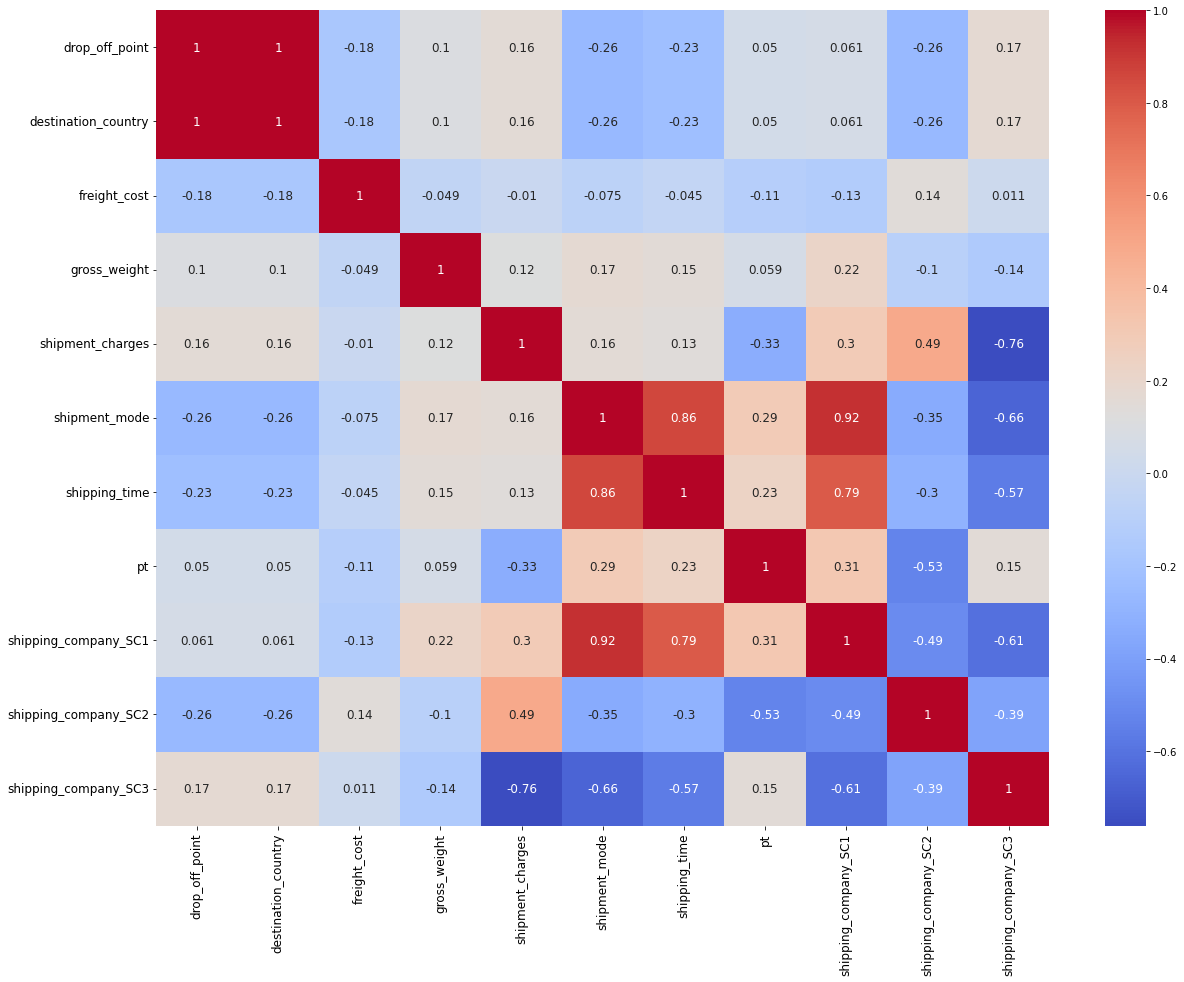

In [64]:
corr = df_train.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### In the heatmap, look for pairs of features that have a high correlation coefficient (either positive or negative). Highly correlated features can be a sign of multicollinearity, which can lead to overfitting in your model. You can consider removing one of the highly correlated features. So dropping shipping_company_SC1 ,shipping_company_SC2 ,and shipping_company_SC3 due to high corr

In [65]:
columns_to_drop = ["shipping_company_SC1" ,"shipping_company_SC2" ,"shipping_company_SC3"]
df_train.drop(columns_to_drop, axis=1, inplace=True)


In [66]:
df_train

,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_time,min_cs,max_cs,pt
0,1,1,88.610000,355.00,0.7500,0,5.00741,100,200000,0.010400
1,1,1,85.650000,105.00,0.9000,1,21.41215,100,2500000,2.113634
2,1,1,86.220000,100.00,0.7500,0,5.33692,100,200000,0.010400
3,1,1,94.430000,1071.00,1.0500,0,5.14792,100,200000,0.000000
4,1,1,94.240000,2007.00,0.7500,0,5.03067,100,200000,0.010400
...,...,...,...,...,...,...,...,...,...,...
5109,0,0,104.860000,304.00,1.1250,1,15.26933,50,4000000,0.000000
5110,0,0,103.561250,240.00,0.5625,1,12.41192,50,4000000,0.056863
5111,0,0,105.550000,400.00,1.1250,1,5.68333,50,4000000,0.000000
5112,0,0,105.950000,398.00,1.1250,1,41.97199,50,4000000,1.521510


In [71]:
x = df_train.drop(['shipping_time'], axis = 1).values #input features
y = df_train['shipping_time'].values#target variable

In [72]:
y

array([ 5.00741, 21.41215,  5.33692, ...,  5.68333, 41.97199,  5.58981])

In [73]:
x

array([[1, 1, 88.61, ..., 100, 200000, 0.0104],
       [1, 1, 85.65, ..., 100, 2500000, 2.113634259259259],
       [1, 1, 86.22, ..., 100, 200000, 0.0104],
       ...,
       [0, 0, 105.55, ..., 50, 4000000, 0.0],
       [0, 0, 105.95, ..., 50, 4000000, 1.521509537037037],
       [0, 0, 91.20092264604624, ..., 50, 4000000, 0.21355324074074075]],
      dtype=object)

In [74]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [80]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [82]:
predict = model.predict(X_test)

In [83]:
predict

array([18.67294   , 20.73704513, 17.967235  , ..., 18.453866  ,
        5.10316   , 29.012963  ])

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
rmse

7.603578109027284

In [91]:
max_observed = np.max(y_test)
eval_metric = math.exp(-rmse/max_observed)
eval_metric

0.8756275905412906

In [92]:
val_score = cross_val_score(model, x,y, scoring="neg_mean_squared_error", cv=10)
rmse_val_score = np.sqrt(-val_score)
print(rmse_val_score)
print(rmse_val_score.mean())
print(rmse_val_score.std())

[ 5.42764625  6.11748168  5.46933037  5.48111218  5.63647388  5.94947095
  6.00995942  5.82883518  8.10959754 13.93239282]
6.796230026586815
2.49178212540285


## Making prediction using model created

In [93]:
df_test = pd.read_csv('shipping_history.csv')
df_test.head()
     

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected
0,0,S002736,2019-10-04 14:27:04,A,Y,GB,IN,86.81,100.0,0.75,Air,SC3,Y
1,1,S002738,2020-01-07 09:39:35,A,Y,GB,IN,94.43,1006.0,0.75,Air,SC3,Y
2,2,S005739,2020-04-11 11:58:10,A,Y,GB,IN,93.55,321.0,1.05,Air,SC2,Y
3,3,S008722,2019-06-23 11:54:41,A,Y,GB,IN,88.74,355.0,1.05,Air,SC2,Y
4,4,S009737,2019-11-20 20:18:01,A,Y,GB,IN,92.83,115.0,1.05,Air,SC2,Y


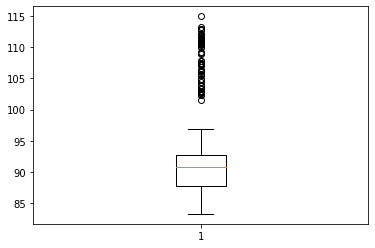

In [94]:
plt.boxplot(df_test['freight_cost'] , whis=1.5 )
plt.show()

In [95]:
df_test = outlier_replacement_zscore(df_test, 'freight_cost', 3)

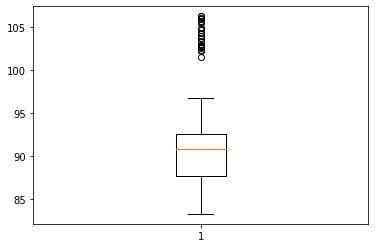

In [96]:
plt.boxplot(df_test['freight_cost'] , whis=1.5 )
plt.show()

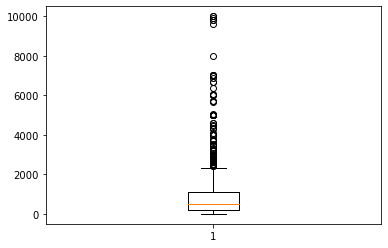

In [97]:
plt.boxplot(df_test['gross_weight'] , whis=1.5 )
plt.show()

In [98]:
df_test = outlier_replacement_zscore(df_test, 'gross_weight', 3)

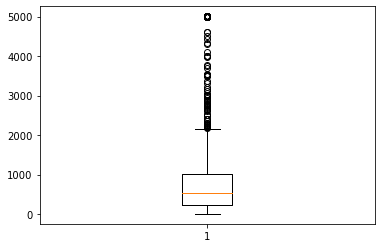

In [99]:
plt.boxplot(df_test['gross_weight'] , whis=1.5 )
plt.show()

In [101]:
df_test["min_cs"] = None
df_test["max_cs"] = None
df_test.loc[df_test['destination_country'] == 'IN', 'min_cs'] = 100
df_test.loc[df_test['destination_country'] == 'BD', 'min_cs'] = 50
df_test.loc[(df_test['destination_country'] == 'IN') & (df_test["shipping_company"] == "SC1"), 'max_cs'] = 2500000
df_test.loc[(df_test['destination_country'] == 'IN') & df_test["shipping_company"].isin(["SC2","SC3"]), 'max_cs'] = 200000
df_test.loc[(df_test['destination_country'] == 'BD') & df_test["shipping_company"].isin(["SC1","SC2"]), 'max_cs'] = 4000000

In [102]:
df_test

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,min_cs,max_cs
0,0,S002736,2019-10-04 14:27:04,A,Y,GB,IN,86.81000,100.0,0.7500,Air,SC3,Y,100,200000
1,1,S002738,2020-01-07 09:39:35,A,Y,GB,IN,94.43000,1006.0,0.7500,Air,SC3,Y,100,200000
2,2,S005739,2020-04-11 11:58:10,A,Y,GB,IN,93.55000,321.0,1.0500,Air,SC2,Y,100,200000
3,3,S008722,2019-06-23 11:54:41,A,Y,GB,IN,88.74000,355.0,1.0500,Air,SC2,Y,100,200000
4,4,S009737,2019-11-20 20:18:01,A,Y,GB,IN,92.83000,115.0,1.0500,Air,SC2,Y,100,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1255,S6996147,2020-03-29 14:19:52,A,X,GB,BD,104.88723,153.0,0.5625,Ocean,SC2,Y,50,4000000
1256,1256,S7622147,2020-03-31 10:24:37,A,X,GB,BD,104.40000,244.0,0.5625,Ocean,SC2,Y,50,4000000
1257,1257,S8020147,2020-03-31 16:16:56,A,X,GB,BD,104.90000,388.0,0.5625,Ocean,SC2,Y,50,4000000
1258,1258,S1402148,2020-04-09 10:56:25,A,X,GB,BD,105.73000,406.0,1.1250,Ocean,SC1,Y,50,4000000


In [103]:
df_test.isnull().sum()

Unnamed: 0             0
shipment_id            0
send_timestamp         0
pick_up_point          0
drop_off_point         0
source_country         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
selected               0
min_cs                 0
max_cs                 0
dtype: int64

In [104]:
#adding processing time feature to test set
df_test["pt"] = None
df_test['pt'] = df_test.apply(lambda x: compute_pt(x['destination_country'], x['shipping_company'], x['send_timestamp']), axis=1)


In [106]:
df_test.isnull().sum()

Unnamed: 0             0
shipment_id            0
send_timestamp         0
pick_up_point          0
drop_off_point         0
source_country         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
selected               0
min_cs                 0
max_cs                 0
pt                     0
dtype: int64

In [107]:
#taking care of category variable
le.fit(df_test['drop_off_point'])#used fit method
df_test['drop_off_point'] = le.transform(df_test['drop_off_point'])
le.fit(df_test['destination_country'])
df_test['destination_country'] = le.transform(df_test['destination_country'])
le.fit(df_test['shipment_mode'])
df_test['shipment_mode'] = le.transform(df_test['shipment_mode'])

In [108]:
df_test

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,min_cs,max_cs,pt
0,0,S002736,2019-10-04 14:27:04,A,1,GB,1,86.81000,100.0,0.7500,0,SC3,Y,100,200000,0.010400
1,1,S002738,2020-01-07 09:39:35,A,1,GB,1,94.43000,1006.0,0.7500,0,SC3,Y,100,200000,0.010400
2,2,S005739,2020-04-11 11:58:10,A,1,GB,1,93.55000,321.0,1.0500,0,SC2,Y,100,200000,0.000000
3,3,S008722,2019-06-23 11:54:41,A,1,GB,1,88.74000,355.0,1.0500,0,SC2,Y,100,200000,0.000000
4,4,S009737,2019-11-20 20:18:01,A,1,GB,1,92.83000,115.0,1.0500,0,SC2,Y,100,200000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1255,S6996147,2020-03-29 14:19:52,A,0,GB,0,104.88723,153.0,0.5625,1,SC2,Y,50,4000000,0.151470
1256,1256,S7622147,2020-03-31 10:24:37,A,0,GB,0,104.40000,244.0,0.5625,1,SC2,Y,50,4000000,0.000000
1257,1257,S8020147,2020-03-31 16:16:56,A,0,GB,0,104.90000,388.0,0.5625,1,SC2,Y,50,4000000,0.070174
1258,1258,S1402148,2020-04-09 10:56:25,A,0,GB,0,105.73000,406.0,1.1250,1,SC1,Y,50,4000000,0.000000


In [110]:
df_test.drop(columns=["Unnamed: 0" , "shipment_id" , "send_timestamp" ,'pick_up_point', 'source_country', "shipping_company" , "selected"], inplace=True)

In [111]:
df_test

,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,min_cs,max_cs,pt
0,1,1,86.81000,100.0,0.7500,0,100,200000,0.010400
1,1,1,94.43000,1006.0,0.7500,0,100,200000,0.010400
2,1,1,93.55000,321.0,1.0500,0,100,200000,0.000000
3,1,1,88.74000,355.0,1.0500,0,100,200000,0.000000
4,1,1,92.83000,115.0,1.0500,0,100,200000,0.000000
...,...,...,...,...,...,...,...,...,...
1255,0,0,104.88723,153.0,0.5625,1,50,4000000,0.151470
1256,0,0,104.40000,244.0,0.5625,1,50,4000000,0.000000
1257,0,0,104.90000,388.0,0.5625,1,50,4000000,0.070174
1258,0,0,105.73000,406.0,1.1250,1,50,4000000,0.000000


In [113]:
test_data_set = df_test.values

In [114]:
fin_predict = model.predict(test_data_set)

In [115]:
fin_predict

array([ 5.057223,  5.267837,  5.235115, ..., 17.724458, 16.075034,
       21.017707])

In [116]:
submission = pd.DataFrame({"shipping_time": fin_predict})

In [117]:
result = pd.read_csv('assignment_result.csv')
result.head()

,shipment_id,shipping_time
0,S002736,NaN
1,S002738,NaN
2,S005739,NaN
3,S008722,NaN
4,S009737,NaN


In [119]:
result['shipping_time'] = submission['shipping_time'].round(decimals = 5)
result.head()

,shipment_id,shipping_time
0,S002736,5.05722
1,S002738,5.26784
2,S005739,5.23511
3,S008722,5.22597
4,S009737,5.14104


In [120]:
result.to_csv('assignment_result.csv', index=False)